In [35]:
from math import pi
import numpy as np
import cv2
from shapely.geometry import Polygon
from shapely.affinity import rotate

In [132]:
srcpath = 'D:/Learning/Satelite-object-detection/halfNMS/'

In [136]:
img_list = [i.split(sep='/')[-1] for i in util.GetFileFromThisRootDir(srcpath)]

In [137]:
img_list

['1000.png', '1115.png', '1131.png', '1133.png', '1139.png']

In [187]:
df = pd.read_csv('D:/Learning/Satelite-object-detection/submission_0318_nms03.csv')
df = pd.concat([df[df.file_name == img_list[0]], df[df.file_name == img_list[1]], df[df.file_name == img_list[2]], df[df.file_name == img_list[3]], df[df.file_name == img_list[4]]]).reset_index(drop=True)

In [188]:
df

file_name  class_id  confidence     point1_x     point1_y     point2_x  \
0    1000.png         4       0.052  1483.846154  2454.615385  1499.230769   
1    1000.png         4       0.070  1340.769231   361.538462  1352.307692   
2    1000.png         4       0.079  1453.846154  2438.461538  1478.461538   
3    1000.png         4       0.091   657.000000   477.000000   702.000000   
4    1000.png         4       0.130  1603.076923   -13.076923  1630.769231   
..        ...       ...         ...          ...          ...          ...   
117  1139.png         4       0.981  2292.857143  1711.428571  2645.714286   
118  1139.png         4       0.982  2458.461538  1630.769231  2504.615385   
119  1139.png         4       0.992   633.846154  1330.000000   672.307692   
120  1139.png         4       0.995  1745.384615  1308.461538  1787.692308   
121  1139.png         4       0.996   313.846154  1641.538462   346.153846   

        point2_y     point3_x     point3_y     point4_x     point4_y  
0    2463.076923  1479.230769  2505.384615  1463.846154  2496.923077  
1     374.615385  1310.769231   411.538462  1299.230769   398.461538  
2    2451.538462  1446.153846  2503.076923  1421.538462  2489.230769  
3     493.000000   697.000000   507.000000   653.000000   491.000000  
4      -2.307692  1600.769231    61.538462  1573.076923    50.769231  
..           ...          ...          ...          ...          ...  
117  2205.714286  2540.000000  2281.428571  2187.142857  1788.571429  
118  1700.769231  2467.692308  1723.076923  2422.307692  1653.846154  
119  1377.692308   533.076923  1502.307692   493.846154  1455.384615  
120  1391.538462  1755.384615  1402.307692  1712.307692  1319.230769  
121  1690.769231   123.846154  1786.153846    91.538462  1736.923077  

[122 rows x 11 columns]

In [194]:
img = df.file_name.unique()[4]
img_path = 'D:/Learning/Satelite-object-detection/halfNMS/' + img
image = cv2.imread(img_path)
image = image[:, :, ::-1]
src_image = image.copy()
classes = ['container', 'oil-tanker', 'aircraft-carrier', 'maritime-vessels']
colors = [(153,0,0), (0,153,0), (0,0,153), (153,0,153)]

for i in list(df[df.file_name == img].index):
    quadrangle = np.array([df['point1_x'][i], df['point1_y'][i], df['point2_x'][i], df['point2_y'][i],
                          df['point3_x'][i], df['point3_y'][i], df['point4_x'][i], df['point4_y'][i]])
    
    cv2.drawContours(src_image, [quadrangle.astype(np.int32).reshape((4, 2))], -1, colors[df['class_id'][i] - 1], 4)
    cv2.putText(src_image, str(df['confidence'][i]), (int(min(df['point1_x'][i], df['point2_x'][i], df['point3_x'][i], df['point4_x'][i])),
                int(min(df['point1_y'][i], df['point2_y'][i], df['point3_y'][i], df['point4_y'][i]))-10), cv2.FONT_HERSHEY_SIMPLEX, 1, colors[int(df['class_id'][i]) -1], 4)

cv2.imwrite('D:/Learning/Satelite-object-detection/halfNMS/test/' + img.strip('.png') + '_before.png', src_image[:, :, ::-1])

True

In [223]:
df = pd.read_csv('D:/Learning/Satelite-object-detection/submission_0317_nms03.csv')

In [224]:
df

file_name  class_id  confidence  point1_x  point1_y  point2_x  point2_y  \
0         0.png         4       0.052     218.0    1278.0     320.0    1278.0   
1         0.png         4       0.068     220.0     842.0     314.0     842.0   
2         0.png         4       0.147     245.0    1953.0     277.0    1994.0   
3         0.png         4       0.990     323.0    2752.0     431.0    2940.0   
4         1.png         1       0.057    2660.0    1420.0    2812.0    1520.0   
...         ...       ...         ...       ...       ...       ...       ...   
14865   999.png         4       0.980    2360.0     244.0    2418.0     284.0   
14866   999.png         4       0.996    1338.0    2716.0    1934.0    2956.0   
14867   999.png         4       0.998    1484.0    2122.0    1976.0    2300.0   
14868   999.png         4       0.998    1548.0     962.0    1666.0     972.0   
14869   999.png         4       1.000    1450.0    1602.0    1578.0    1610.0   

       point3_x  point3_y  point4_x  point4_y  
0         320.0    1538.0     218.0    1538.0  
1         314.0    1094.0     220.0    1094.0  
2         100.0    2083.0      68.0    2042.0  
3         381.0    2972.0     272.0    2783.0  
4        2774.0    1562.0    2622.0    1462.0  
...         ...       ...       ...       ...  
14865    2397.0     311.0    2339.0     271.0  
14866    1888.0    3054.0    1292.0    2814.0  
14867    1928.0    2430.0    1438.0    2250.0  
14868    1614.0    1484.0    1496.0    1476.0  
14869    1530.0    2034.0    1404.0    2024.0  

[14870 rows x 11 columns]

In [225]:
def poly (rbox):
    # rbox : [x1, y1, x2, y2, x3, y3, x4, y4]
    
    return Polygon([(rbox[0], rbox[1]), (rbox[2], rbox[3]), (rbox[4], rbox[5]), (rbox[6], rbox[7])])

In [226]:
def half_iou(rbox1, rbox2):
    poly1 = poly(rbox1)
    poly2 = poly(rbox2)
    
    if poly1.area >= poly2.area:
        return poly1.intersection(poly2).area / poly2.area
        
    else :
        return poly2.intersection(poly1).area / poly1.area

In [227]:
# Score 기준으로 자름

df['NMS'] = True
halfiou_thresh = {1: 0.7, 2: 0.7, 3: 0.3, 4: 0.7}
new_df = pd.DataFrame(columns = ['file_name', 'class_id','confidence', 'point1_x', 'point1_y', 'point2_x', 'point2_y', 
                                   'point3_x', 'point3_y', 'point4_x', 'point4_y', 'NMS'])

for cls in df.class_id.unique():
    df_cls = df[df.class_id == cls]
    image_list = df_cls.file_name.unique()
    
    for img in image_list:
        idx_list = list(df_cls[df_cls.file_name == img].index)

        for idx in idx_list:
            rbox1 = [df_cls['point1_x'][idx], df_cls['point1_y'][idx], df_cls['point2_x'][idx], df_cls['point2_y'][idx], df_cls['point3_x'][idx], df_cls['point3_y'][idx], df_cls['point4_x'][idx], df_cls['point4_y'][idx]]
            score1 = df_cls['confidence'][idx]
            for idx2 in idx_list[idx_list.index(idx)+1:]:
                rbox2 = [df_cls['point1_x'][idx2], df_cls['point1_y'][idx2], df_cls['point2_x'][idx2], df_cls['point2_y'][idx2], df_cls['point3_x'][idx2], df_cls['point3_y'][idx2], df_cls['point4_x'][idx2], df_cls['point4_y'][idx2]]
                score2 = df_cls['confidence'][idx2]

                if half_iou(rbox1, rbox2) >= halfiou_thresh[cls] :
                    
                    if score1 == score2:
                        if poly(rbox1).area >= poly(rbox2).area:
                            df_cls['NMS'][idx2] = False
                        else:
                            df_cls['NMS'][idx] = False
    
                    elif score1 > score2:
                        df_cls['NMS'][idx2] = False
                
                    else :
                        df_cls['NMS'][idx] = False
    
    new_df = pd.concat([new_df, df_cls]).reset_index(drop=True)

new_df = new_df[new_df.NMS == True].reset_index(drop=True)

C:\Users\user\.conda\envs\keras\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [228]:
new_df

file_name class_id  confidence  point1_x  point1_y  point2_x  point2_y  \
0         0.png        4       0.052     218.0    1278.0     320.0    1278.0   
1         0.png        4       0.068     220.0     842.0     314.0     842.0   
2         0.png        4       0.147     245.0    1953.0     277.0    1994.0   
3         0.png        4       0.990     323.0    2752.0     431.0    2940.0   
4         1.png        4       0.094    2390.0    1858.0    2500.0    1988.0   
...         ...      ...         ...       ...       ...       ...       ...   
14621   720.png        3       0.989    2558.0     -21.0    2794.0     494.0   
14622   823.png        3       0.102     904.0    1693.0    1178.0    1996.0   
14623   911.png        3       0.150    2444.0     -14.0    2972.0     492.0   
14624   981.png        3       0.103    2320.0     910.0    2706.0     910.0   
14625   981.png        3       0.230    2370.0     -37.0    2692.0     -37.0   

       point3_x  point3_y  point4_x  point4_y   NMS  
0         320.0    1538.0     218.0    1538.0  True  
1         314.0    1094.0     220.0    1094.0  True  
2         100.0    2083.0      68.0    2042.0  True  
3         381.0    2972.0     272.0    2783.0  True  
4        2462.0    2012.0    2352.0    1880.0  True  
...         ...       ...       ...       ...   ...  
14621    2589.0     537.0    2353.0      20.0  True  
14622    1039.0    2118.0     765.0    1814.0  True  
14623    2806.0     713.0    2278.0     204.0  True  
14624    2706.0    1642.0    2320.0    1642.0  True  
14625    2692.0     777.0    2370.0     777.0  True  

[14626 rows x 12 columns]

In [231]:
new_df.drop('NMS', axis=1, inplace=True)

KeyError: "['NMS'] not found in axis"

In [232]:
new_df

file_name class_id  confidence  point1_x  point1_y  point2_x  point2_y  \
0         0.png        4       0.052     218.0    1278.0     320.0    1278.0   
1         0.png        4       0.068     220.0     842.0     314.0     842.0   
2         0.png        4       0.147     245.0    1953.0     277.0    1994.0   
3         0.png        4       0.990     323.0    2752.0     431.0    2940.0   
4         1.png        4       0.094    2390.0    1858.0    2500.0    1988.0   
...         ...      ...         ...       ...       ...       ...       ...   
14621   720.png        3       0.989    2558.0     -21.0    2794.0     494.0   
14622   823.png        3       0.102     904.0    1693.0    1178.0    1996.0   
14623   911.png        3       0.150    2444.0     -14.0    2972.0     492.0   
14624   981.png        3       0.103    2320.0     910.0    2706.0     910.0   
14625   981.png        3       0.230    2370.0     -37.0    2692.0     -37.0   

       point3_x  point3_y  point4_x  point4_y  
0         320.0    1538.0     218.0    1538.0  
1         314.0    1094.0     220.0    1094.0  
2         100.0    2083.0      68.0    2042.0  
3         381.0    2972.0     272.0    2783.0  
4        2462.0    2012.0    2352.0    1880.0  
...         ...       ...       ...       ...  
14621    2589.0     537.0    2353.0      20.0  
14622    1039.0    2118.0     765.0    1814.0  
14623    2806.0     713.0    2278.0     204.0  
14624    2706.0    1642.0    2320.0    1642.0  
14625    2692.0     777.0    2370.0     777.0  

[14626 rows x 11 columns]

In [233]:
new_df.to_csv('D:/Learning/Satelite-object-detection/submission_0319_halfNMS.csv', index=False)

In [234]:
pd.read_csv('D:/Learning/Satelite-object-detection/submission_0319_halfNMS.csv')

file_name  class_id  confidence  point1_x  point1_y  point2_x  point2_y  \
0         0.png         4       0.052     218.0    1278.0     320.0    1278.0   
1         0.png         4       0.068     220.0     842.0     314.0     842.0   
2         0.png         4       0.147     245.0    1953.0     277.0    1994.0   
3         0.png         4       0.990     323.0    2752.0     431.0    2940.0   
4         1.png         4       0.094    2390.0    1858.0    2500.0    1988.0   
...         ...       ...         ...       ...       ...       ...       ...   
14621   720.png         3       0.989    2558.0     -21.0    2794.0     494.0   
14622   823.png         3       0.102     904.0    1693.0    1178.0    1996.0   
14623   911.png         3       0.150    2444.0     -14.0    2972.0     492.0   
14624   981.png         3       0.103    2320.0     910.0    2706.0     910.0   
14625   981.png         3       0.230    2370.0     -37.0    2692.0     -37.0   

       point3_x  point3_y  point4_x  point4_y  
0         320.0    1538.0     218.0    1538.0  
1         314.0    1094.0     220.0    1094.0  
2         100.0    2083.0      68.0    2042.0  
3         381.0    2972.0     272.0    2783.0  
4        2462.0    2012.0    2352.0    1880.0  
...         ...       ...       ...       ...  
14621    2589.0     537.0    2353.0      20.0  
14622    1039.0    2118.0     765.0    1814.0  
14623    2806.0     713.0    2278.0     204.0  
14624    2706.0    1642.0    2320.0    1642.0  
14625    2692.0     777.0    2370.0     777.0  

[14626 rows x 11 columns]

In [236]:
new_df[new_df.class_id == 3]['file_name'].unique()

array(['1052.png', '1058.png', '1062.png', '1102.png', '1105.png',
       '1131.png', '1142.png', '1162.png', '1171.png', '1177.png',
       '158.png', '159.png', '160.png', '164.png', '165.png', '166.png',
       '169.png', '170.png', '172.png', '176.png', '178.png', '184.png',
       '185.png', '193.png', '194.png', '342.png', '344.png', '353.png',
       '357.png', '361.png', '364.png', '365.png', '374.png', '379.png',
       '381.png', '384.png', '387.png', '388.png', '391.png', '673.png',
       '688.png', '698.png', '720.png', '823.png', '911.png', '981.png'],
      dtype=object)

In [249]:
new_df

file_name class_id  confidence  point1_x  point1_y  point2_x  point2_y  \
0         0.png        4       0.052     218.0    1278.0     320.0    1278.0   
1         0.png        4       0.068     220.0     842.0     314.0     842.0   
2         0.png        4       0.147     245.0    1953.0     277.0    1994.0   
3         0.png        4       0.990     323.0    2752.0     431.0    2940.0   
4         1.png        4       0.094    2390.0    1858.0    2500.0    1988.0   
...         ...      ...         ...       ...       ...       ...       ...   
14621   720.png        3       0.989    2558.0     -21.0    2794.0     494.0   
14622   823.png        3       0.102     904.0    1693.0    1178.0    1996.0   
14623   911.png        3       0.150    2444.0     -14.0    2972.0     492.0   
14624   981.png        3       0.103    2320.0     910.0    2706.0     910.0   
14625   981.png        3       0.230    2370.0     -37.0    2692.0     -37.0   

       point3_x  point3_y  point4_x  point4_y    NMS  
0         320.0    1538.0     218.0    1538.0   True  
1         314.0    1094.0     220.0    1094.0   True  
2         100.0    2083.0      68.0    2042.0   True  
3         381.0    2972.0     272.0    2783.0   True  
4        2462.0    2012.0    2352.0    1880.0   True  
...         ...       ...       ...       ...    ...  
14621    2589.0     537.0    2353.0      20.0   True  
14622    1039.0    2118.0     765.0    1814.0  False  
14623    2806.0     713.0    2278.0     204.0   True  
14624    2706.0    1642.0    2320.0    1642.0  False  
14625    2692.0     777.0    2370.0     777.0  False  

[14626 rows x 12 columns]

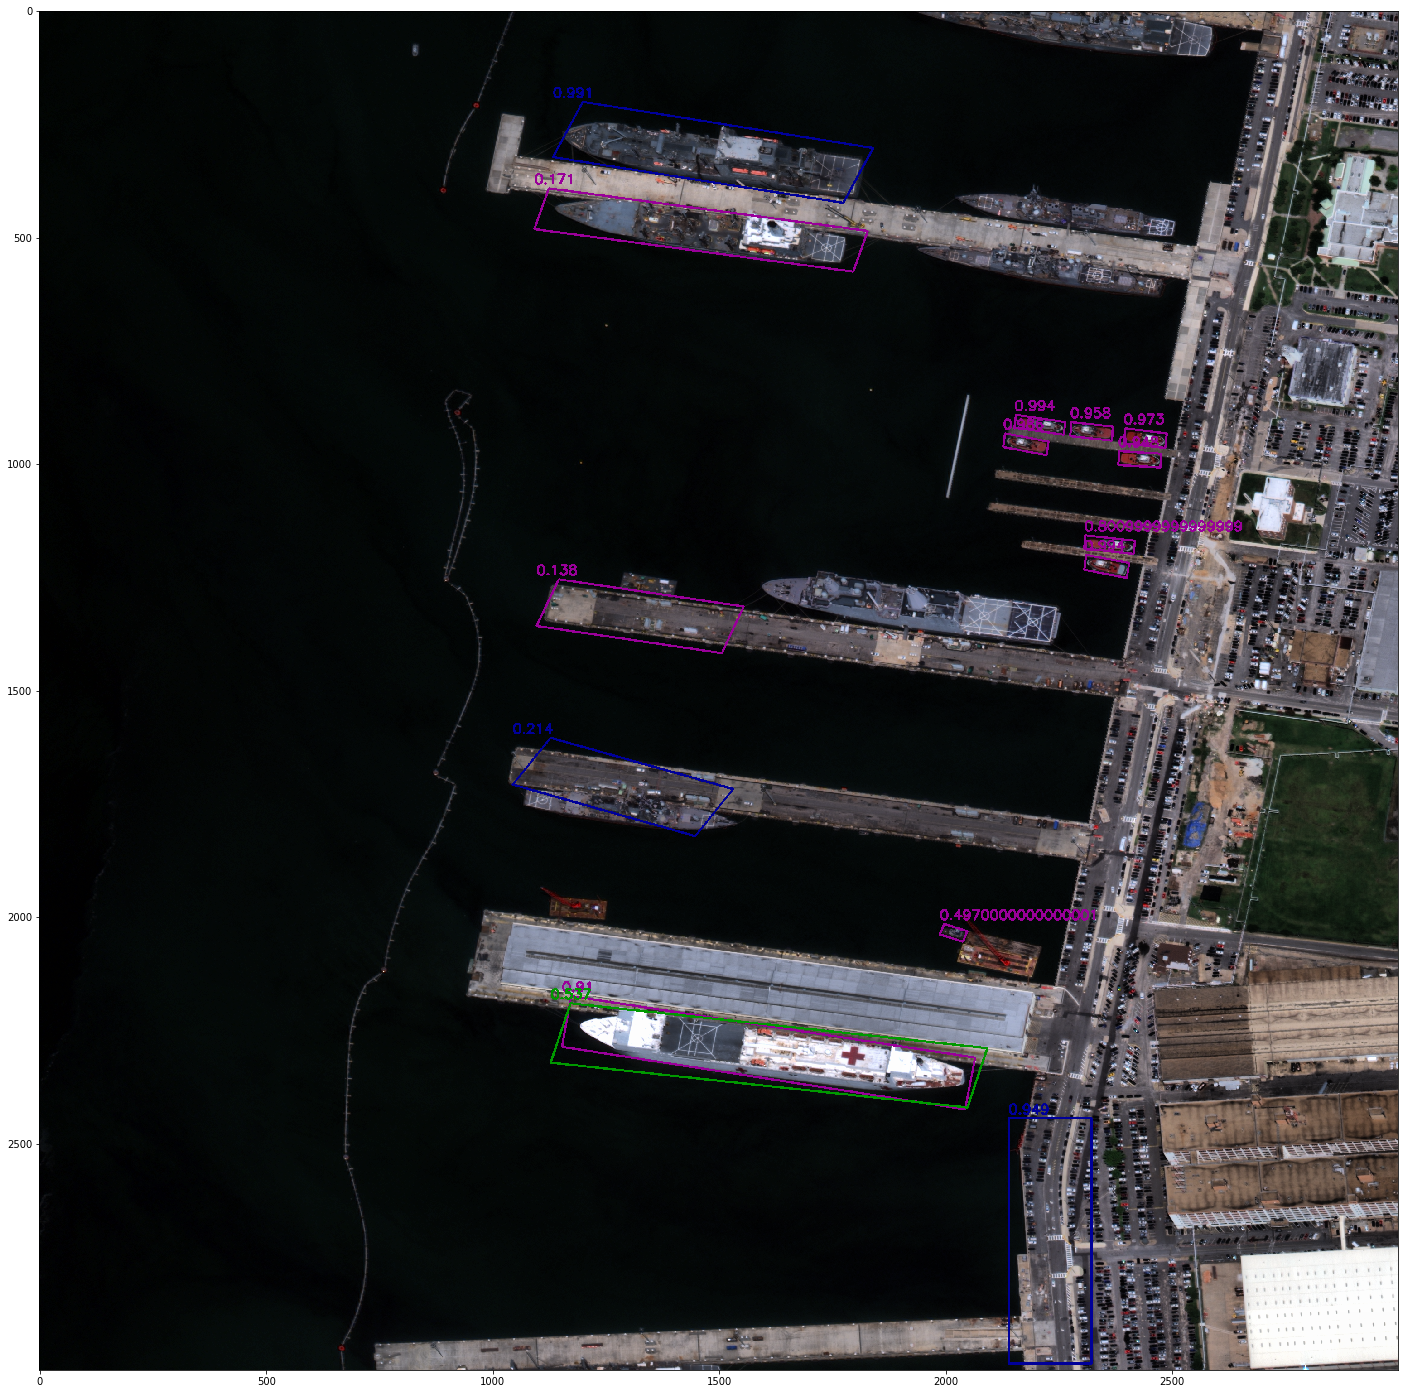

In [255]:
img = '165.png'
img_path = 'D:/Learning/Satelite-object-detection/testsets/' + img
image = cv2.imread(img_path)
image = image[:, :, ::-1]
src_image = image.copy()
classes = ['container', 'oil-tanker', 'aircraft-carrier', 'maritime-vessels']
colors = [(153,0,0), (0,153,0), (0,0,153), (153,0,153)]

for i in list(new_df[new_df.file_name == img].index):
    quadrangle = np.array([new_df['point1_x'][i], new_df['point1_y'][i], new_df['point2_x'][i], new_df['point2_y'][i],
                          new_df['point3_x'][i], new_df['point3_y'][i], new_df['point4_x'][i], new_df['point4_y'][i]])
    
    cv2.drawContours(src_image, [quadrangle.astype(np.int32).reshape((4, 2))], -1, colors[new_df['class_id'][i] - 1], 4)
    cv2.putText(src_image, str(new_df['confidence'][i]), (int(min(new_df['point1_x'][i], new_df['point2_x'][i], new_df['point3_x'][i], new_df['point4_x'][i])),
                int(min(new_df['point1_y'][i], new_df['point2_y'][i], new_df['point3_y'][i], new_df['point4_y'][i]))-10), cv2.FONT_HERSHEY_SIMPLEX, 1, colors[int(new_df['class_id'][i]) -1], 4)

# cv2.imwrite('D:/Learning/Satelite-object-detection/halfNMS/test/' + img.strip('.png') + '_after.png', src_image[:, :, ::-1])
plt.figure(figsize=(25, 25))
plt.imshow(src_image)

In [263]:
df_cls = new_df
df_cls['NMS'] = True
halfiou_thresh = 0.9

for img in image_list:
    idx_list = list(df_cls[df_cls.file_name == img].index)

    for idx in idx_list:
        rbox1 = [df_cls['point1_x'][idx], df_cls['point1_y'][idx], df_cls['point2_x'][idx], df_cls['point2_y'][idx], df_cls['point3_x'][idx], df_cls['point3_y'][idx], df_cls['point4_x'][idx], df_cls['point4_y'][idx]]
        score1 = df_cls['confidence'][idx]
        for idx2 in idx_list[idx_list.index(idx)+1:]:
            rbox2 = [df_cls['point1_x'][idx2], df_cls['point1_y'][idx2], df_cls['point2_x'][idx2], df_cls['point2_y'][idx2], df_cls['point3_x'][idx2], df_cls['point3_y'][idx2], df_cls['point4_x'][idx2], df_cls['point4_y'][idx2]]
            score2 = df_cls['confidence'][idx2]

            if half_iou(rbox1, rbox2) >= halfiou_thresh :

                if score1 == score2:
                    if poly(rbox1).area >= poly(rbox2).area:
                        df_cls['NMS'][idx2] = False
                    else:
                        df_cls['NMS'][idx] = False

                elif score1 > score2:
                    df_cls['NMS'][idx2] = False

                else :
                    df_cls['NMS'][idx] = False
df_cls = df_cls[df_cls.NMS == True]

C:\Users\user\.conda\envs\keras\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\.conda\envs\keras\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [264]:
df_cls.drop('NMS', axis=1, inplace=True)

In [265]:
df_cls

file_name class_id  confidence  point1_x  point1_y  point2_x  point2_y  \
0         0.png        4       0.052     218.0    1278.0     320.0    1278.0   
1         0.png        4       0.068     220.0     842.0     314.0     842.0   
2         0.png        4       0.147     245.0    1953.0     277.0    1994.0   
3         0.png        4       0.990     323.0    2752.0     431.0    2940.0   
4         1.png        4       0.094    2390.0    1858.0    2500.0    1988.0   
...         ...      ...         ...       ...       ...       ...       ...   
14617   391.png        3       0.122    1870.0    1548.0    1893.0    2028.0   
14618   673.png        3       0.742    1901.0     988.0    2133.0    1795.0   
14619   688.png        3       0.704    2577.0      -4.0    2802.0     493.0   
14621   720.png        3       0.989    2558.0     -21.0    2794.0     494.0   
14623   911.png        3       0.150    2444.0     -14.0    2972.0     492.0   

       point3_x  point3_y  point4_x  point4_y  
0         320.0    1538.0     218.0    1538.0  
1         314.0    1094.0     220.0    1094.0  
2         100.0    2083.0      68.0    2042.0  
3         381.0    2972.0     272.0    2783.0  
4        2462.0    2012.0    2352.0    1880.0  
...         ...       ...       ...       ...  
14617    1710.0    2038.0    1688.0    1557.0  
14618    1980.0    1886.0    1748.0    1078.0  
14619    2554.0     541.0    2328.0      42.0  
14621    2589.0     537.0    2353.0      20.0  
14623    2806.0     713.0    2278.0     204.0  

[14600 rows x 11 columns]

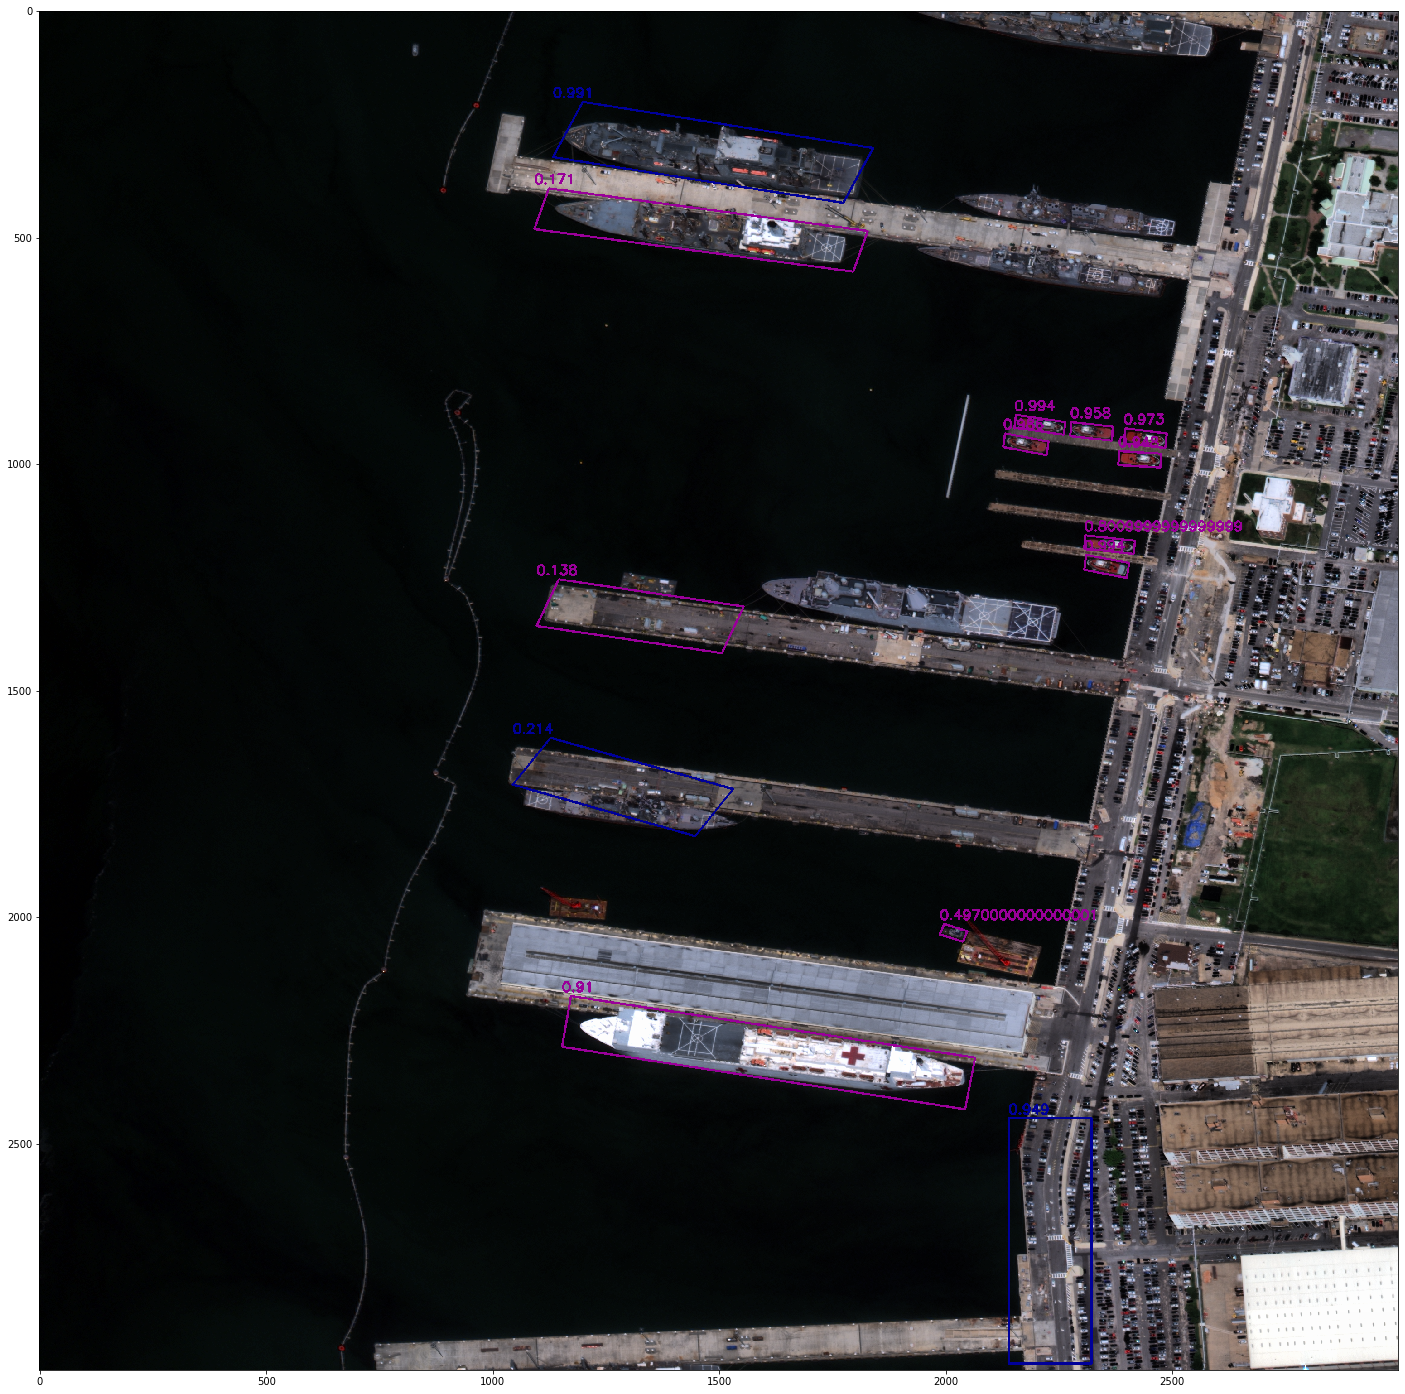

In [256]:
img = '165.png'
img_path = 'D:/Learning/Satelite-object-detection/testsets/' + img
image = cv2.imread(img_path)
image = image[:, :, ::-1]
src_image = image.copy()
classes = ['container', 'oil-tanker', 'aircraft-carrier', 'maritime-vessels']
colors = [(153,0,0), (0,153,0), (0,0,153), (153,0,153)]

for i in list(df_cls[df_cls.file_name == img].index):
    quadrangle = np.array([df_cls['point1_x'][i], df_cls['point1_y'][i], df_cls['point2_x'][i], df_cls['point2_y'][i],
                          df_cls['point3_x'][i], df_cls['point3_y'][i], df_cls['point4_x'][i], df_cls['point4_y'][i]])
    
    cv2.drawContours(src_image, [quadrangle.astype(np.int32).reshape((4, 2))], -1, colors[df_cls['class_id'][i] - 1], 4)
    cv2.putText(src_image, str(df_cls['confidence'][i]), (int(min(df_cls['point1_x'][i], df_cls['point2_x'][i], df_cls['point3_x'][i], df_cls['point4_x'][i])),
                int(min(df_cls['point1_y'][i], df_cls['point2_y'][i], df_cls['point3_y'][i], df_cls['point4_y'][i]))-10), cv2.FONT_HERSHEY_SIMPLEX, 1, colors[int(df_cls['class_id'][i]) -1], 4)

# cv2.imwrite('D:/Learning/Satelite-object-detection/halfNMS/test/' + img.strip('.png') + '_after.png', src_image[:, :, ::-1])
plt.figure(figsize=(25, 25))
plt.imshow(src_image)

In [266]:
df_cls.to_csv('D:/Learning/Satelite-object-detection/submission_0319_halfNMS_cls50.csv', index=False)

In [267]:
pd.read_csv('D:/Learning/Satelite-object-detection/submission_0319_halfNMS_cls50.csv')

file_name  class_id  confidence  point1_x  point1_y  point2_x  point2_y  \
0         0.png         4       0.052     218.0    1278.0     320.0    1278.0   
1         0.png         4       0.068     220.0     842.0     314.0     842.0   
2         0.png         4       0.147     245.0    1953.0     277.0    1994.0   
3         0.png         4       0.990     323.0    2752.0     431.0    2940.0   
4         1.png         4       0.094    2390.0    1858.0    2500.0    1988.0   
...         ...       ...         ...       ...       ...       ...       ...   
14595   391.png         3       0.122    1870.0    1548.0    1893.0    2028.0   
14596   673.png         3       0.742    1901.0     988.0    2133.0    1795.0   
14597   688.png         3       0.704    2577.0      -4.0    2802.0     493.0   
14598   720.png         3       0.989    2558.0     -21.0    2794.0     494.0   
14599   911.png         3       0.150    2444.0     -14.0    2972.0     492.0   

       point3_x  point3_y  point4_x  point4_y  
0         320.0    1538.0     218.0    1538.0  
1         314.0    1094.0     220.0    1094.0  
2         100.0    2083.0      68.0    2042.0  
3         381.0    2972.0     272.0    2783.0  
4        2462.0    2012.0    2352.0    1880.0  
...         ...       ...       ...       ...  
14595    1710.0    2038.0    1688.0    1557.0  
14596    1980.0    1886.0    1748.0    1078.0  
14597    2554.0     541.0    2328.0      42.0  
14598    2589.0     537.0    2353.0      20.0  
14599    2806.0     713.0    2278.0     204.0  

[14600 rows x 11 columns]